In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import collections

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
#hv.extension('bokeh')
hv.extension('matplotlib')
#hv.output(size=300)

from scipy import stats
from scipy import optimize

import warnings
warnings.filterwarnings('ignore')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# data

folder = '../data/'
fn1 = 'orit_query_data.csv'
fn2 = 'host_p4600_data-FIXED-28_8_18.csv'
fn3 = 'filtered_orit_hits.csv'
fn4 = 'dframe_microdb_human.csv'

# order FPQVCT
mob_color = ['blue','green','red','orange','violet','gray']

In [3]:
# functions

def assemble_edgelists(df):
    # df is frame per grouped plasmid
    # upper triangular
    # node1	node2	p-value	plasmid_name
    # single occurence with weakest p-value stored
    #print(df)
    #n = len(df.query_index.unique()) .. not only unique but all orits
    n = df.shape[0]
    tmp = []
    for i in range(n):
        for j in range(i+1,n):
            tmp.append([df.iloc[i].query_index,
                        df.iloc[j].query_index,
                        min([df.iloc[i].p_value,df.iloc[j].p_value])])
    return pd.DataFrame(tmp,columns=['node1','node2','p_value'])                

def frames_to_graph(T_node_list, T_edge_list, create=nx.Graph()):

    # edges
    T = nx.convert_matrix.from_pandas_edgelist(T_edge_list, 'node1', 'node2', 
                                               edge_attr=list(T_edge_list[['plasmid_id','p_value']]), 
                                               create_using=create) #nx.MultiGraph()

    # nodes
    T.add_nodes_from(T_node_list['node'].values)
    data_keys = list(T_node_list.columns.values[1:])
    if (len(data_keys) > 0):
        for i in range(len(T.nodes())):
            for ii in range(len(data_keys)):
                T.node[T_node_list.iloc[i,0]][data_keys[ii]] = T_node_list.iloc[i,ii+1]

    return T

# add weight from pval in order to plot approx sorting on pval
def rescale_pval(x,df):
    '''scales p_value exponent to 0-1'''
    return np.abs((x-df.max())/(df.max()-df.min()))

def get_node_color(T):
    
    # create empty list for node colors
    node_color = []
    
    # for each node in the graph
    for node in T.nodes(data=True):

        # if the node has the attribute group1
        if 'F' in node[1]['Mob']:
            node_color.append(mob_color[0])

        # if the node has the attribute group1
        elif 'P' in node[1]['Mob']:
            node_color.append(mob_color[1])

        # if the node has the attribute group1
        elif 'Q' in node[1]['Mob']:
            node_color.append(mob_color[2])

        # if the node has the attribute group1
        elif 'V' in node[1]['Mob']:
            node_color.append(mob_color[3])

        # if the node has the attribute group1
        elif 'C' in node[1]['Mob']:
            node_color.append(mob_color[4])  

        elif 'T' in node[1]['Mob']:
            node_color.append(mob_color[5])  
    return node_color

def func(x, a,b,c):
    return (x**-(a))*b+c

def plot_degree_histogram(G):
    #https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degree_sequence = np.array(degree_sequence)
    degree_sequence = degree_sequence[degree_sequence>0]
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    #cnt = [x/len(degree_sequence) for x in cnt]

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, color='k')
    plt.title("Degree Histogram")
    plt.ylabel("Counts")
    plt.xlabel("Degree $k$")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)
    plt.show()

def plot_degree_distribution(G):
    #https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degree_sequence = np.array(degree_sequence)
    degree_sequence = degree_sequence[degree_sequence>0]
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    #deg = [x+1e-8 for x in deg]
    cnt = [x/len(degree_sequence) for x in cnt]
    
    fig, ax = plt.subplots()
    plt.scatter(deg, cnt, color='k')
#     plt.yscale('log')
#     plt.xscale('log')
    plt.title("Degree Distribution")
    plt.ylabel("$P(k)$")
    plt.xlabel("Degree $k$")
    
    # curve fit to obtain lambda
    popt, pcov = optimize.curve_fit(func,deg,cnt,maxfev=2000)
    perr = np.sqrt(np.diag(pcov))
    print(popt)
    plt.plot(deg, func((deg), *popt), 'r-',zorder=0)
    
    plt.show()

def plot_degree_rank(G):
    # https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_rank.html#sphx-glr-auto-examples-drawing-plot-degree-rank-py
    # Author: Aric Hagberg <aric.hagberg@gmail.com>
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    # print "Degree sequence", degree_sequence
    dmax = max(degree_sequence)

    plt.loglog(degree_sequence, 'k-', marker='o')
    plt.title("Degree rank plot")
    plt.ylabel("Degree $k$")
    plt.xlabel("Rank")

    plt.show()
    
# def func(x, a,b):
#     return a*x+b

def plot_degree_clustering(G):
    #get degree per node
    #get clustering per node
    #combine - plot 
    degree_sequence = T.degree()  # degree sequence
    df = (pd
          .DataFrame(degree_sequence,columns=['node','degree'])
          .sort_values(by='node')
         )
    clustering = nx.clustering(G)
    tmp = (pd
          .DataFrame(list(clustering.items()),columns=['node','cc'])
          .sort_values(by='node')
         )
    df['cc'] = tmp.cc.values
    
    print(df.head())
    
    #plot
    plt.scatter(df.degree, df.cc, color='k')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(0.2,1.1)
    plt.xlim(1,100)
    plt.ylabel("Clustering coefficient $C(k)$")
    plt.xlabel("Degree $k$")
    plt.plot([60,15],[0.2,1],'r')
    plt.title("Scaling of $C(k)$ with the degree")
    plt.show()
    
# https://stackoverflow.com/questions/45350222/select-nodes-and-edges-form-networkx-graph-with-attributes
def plot_connected_components(G):
    
    mpl.rcParams['figure.dpi'] = 300
    
    #Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
    #Gcc = (G.subgraph(c) for c in nx.connected_components(G))
    connected_nodes = [list(component)  for component in list(nx.connected_components(G)) if len(component) > 1]
    for component in [connected_nodes[0]]:
        Gcc = G.subgraph(component).copy()
        pos = nx.spring_layout(Gcc,seed=22,k=0.6)
        plt.axis('off')
        nx.draw_networkx_nodes(Gcc, pos, node_size=22, node_color=get_node_color(Gcc))
        
        edges = Gcc.edges()
        #colors = [Gcc[u][v]['color'] for u,v in edges]
        weights = [Gcc[u][v]['weight'] for u,v in edges]
        
        nx.draw_networkx_edges(Gcc, pos, edge_width=weights, alpha=0.1)
    
    custom_lines = [Line2D([0], [0], color=mob_color[0], lw=2),
                    Line2D([0], [0], color=mob_color[1], lw=2),
                    Line2D([0], [0], color=mob_color[2], lw=2),
                    Line2D([0], [0], color=mob_color[3], lw=2),
                    Line2D([0], [0], color=mob_color[4], lw=2),
                    Line2D([0], [0], color=mob_color[5], lw=2)]
    plt.legend(custom_lines,['F','P','Q','V','C','T'])
    
    # mark top plasmids pNL1 F, BNC1 Plasmid 1 Q, pBBR1 V
    ann1 = 'pNL1'
    ann2 = 'BNC1 Plasmid 1'
    ann3 = 'pBBR1'
    plt.annotate(ann1,xy=(0.3,0.9))
    plt.annotate(ann2,xy=(0.3,-0.9))
    plt.annotate(ann3,xy=(-0.3,0.9))
    plt.plot([0.172,0.36],[0.1,0.8],'k',linewidth=0.7)
    plt.plot([0.14,0.36],[0.02,-0.8],'k',linewidth=0.7)
    plt.plot([0.038,-0.2],[0.12,0.8],'k',linewidth=0.7)
    
    plt.savefig('f3a.svg')
    
# build multigraph to get correct num edges per node
def frames_to_graph(T_node_list, T_edge_list, create=nx.Graph()):

    # edges
    T = nx.convert_matrix.from_pandas_edgelist(T_edge_list, 'node1', 'node2', 
                                               edge_attr=list(T_edge_list[['plasmid_id','p_value']]), 
                                               create_using=create)

    # nodes
    T.add_nodes_from(T_node_list['node'].values)
    data_keys = list(T_node_list.columns.values[1:])
    if (len(data_keys) > 0):
        for i in range(len(T.nodes())):
            for ii in range(len(data_keys)):
                T.node[T_node_list.iloc[i,0]][data_keys[ii]] = T_node_list.iloc[i,ii+1]

    return T

# multiple MOB plasmids are counted separately for each MOB group
# No. connections: all: n*(n-1), unique among mob groups: unique-1.
def get_all_conn(x):
    # x...list of mob
    return (len(x)*(len(x)-1))/2

def get_unique_group_conn(x):
    # x...list of mob
    return len(set(x))-1

# transform p4600 to long format based on MOB - only one mob per column
# separately for mob and orit MOB
def melt_mob_relaxase(row):
    new_rows = []
    if len(row.Mob) > 1:
        for mob in row.Mob:
            row_tmp = row.copy(deep=True)
            row_tmp.Mob = mob
            new_rows.append(row_tmp)
    else:
        new_rows.append(row.copy(deep=True))
    return new_rows

def melt_mob_orit(row):
    moblist = [el.split(',')[3] for el in row['oriT-strast']]
    
    new_rows = []
    for mob in moblist:
        row_tmp = row.copy(deep=True)
        row_tmp['Mob_orit'] = mob
        new_rows.append(row_tmp)
    return new_rows

In [4]:
def plot_holoviews_chord(p4600_mob, cutoff=-8, remove_self=True):
    # prepare data for plotting
    # simplify via pval cutoff
    p4600_1e9 = p4600_mob[p4600_mob.min_pval.astype(float)<cutoff]
    p4600_1e9.shape[0]
    
    nodes_tmp = (pd
                 .DataFrame(p4600_mob.Mob_orit1.unique()).rename(columns={0:'name'})
                 .iloc[[3,4,0,1,2,5]]
                )
    nodes = hv.Dataset(nodes_tmp, 'index')
    #print(nodes.data.head())

    if not remove_self:
        # make flux data
        l = p4600_1e9.groupby(['Mob_orit1','Mob_orit2']).plasmid_id.count()
        #print(l.head())

        # long to wide
        w = l.unstack().fillna(0)
        #print(w.head())
         
        #encode links with nodes index
        links = (pd
                 .DataFrame(l)
                 .reset_index()
                 .rename(columns={'Mob_orit1':'source','Mob_orit2':'target','plasmid_id':'value'})
                )
        links.source = nodes_tmp.reset_index().set_index('name').loc[links.source,'index'].values
        links.target = nodes_tmp.reset_index().set_index('name').loc[links.target,'index'].values
        #links.head()
        
    else:
        # remove self connections as they are disturbing the plot
        l = pd.DataFrame(p4600_1e9.groupby(['Mob_orit1','Mob_orit2']).plasmid_id.count()).reset_index()
        l.at[l.Mob_orit1==l.Mob_orit2,'plasmid_id'] = 0
        
        #encode links with nodes index
        links = l.rename(columns={'Mob_orit1':'source','Mob_orit2':'target','plasmid_id':'value'})
        links.source = nodes_tmp.reset_index().set_index('name').loc[links.source,'index'].values
        links.target = nodes_tmp.reset_index().set_index('name').loc[links.target,'index'].values
        #links.head()

        w = p4600_1e9.groupby(['Mob_orit1','Mob_orit2']).plasmid_id.count().unstack().fillna(0)
        w.values[tuple([np.arange(w.shape[0])]*2)] = 0
        #print(w)
        
    

    return l, w, links, nodes

## General properties

In [5]:
# load data

# nodelist
orit = pd.read_csv(folder+fn1,sep=';')
orit.reset_index(inplace=True)
orit_nodelist = orit.rename(index=str,columns={"index": "node"})
orit_nodelist['node'] = orit_nodelist['node'].values+1 
orit_nodelist.head()

# metadata
p4600 = pd.read_csv(folder+fn2,sep=';')
p4600.reset_index(inplace=True)
print(p4600.columns)

df4 = pd.read_csv(folder+fn3)

df4['ismob'] = p4600.set_index('Genbank').loc[df4.plasmid_id.values]['Is_Mob?'].values

# print data characteristics
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.plasmid_id.unique().shape[0])

# relaxase-typed, non-typed
print(df4[df4.ismob==1].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4[df4.ismob==0].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())

df4.head()


Index(['index', 'Genbank', 'Plasmid_name', 'Strain', 'Species', 'Genus',
       'Order', 'Class', 'Phylum', 'Kingdom', 'Size (bp)', 'GC contents (%)',
       'Rep typea', 'ColE1b', 'GR', 'Rep_family', 'MOBc', 'MPFc', 'T4CPd',
       'VirB4d', 'Putative transferabilitye', 'Is_Mob?', 'Mob'],
      dtype='object')
1331
0.6386756238003839
0.4297520661157025
0.5702479338842975


,nic_location,query_index,mob,mob_subgroup,p_value,plasmid_id,Genbank,p_cutoff,q-value,E-value,seqid,std_range,ir_size,orit_index,ismob
0,184676,14,P,6,-8.9187,NC_009926,NC_009926,-8.0,1.605789e-110,0.001188,0.7,>=mean-1std,8,0,1
1,232470,50,F,u,-8.1666,NC_009926,NC_009926,-8.0,2.264682e-97,0.006711,0.7,>=mean-1std,10,2,1
2,147650,64,Q,2,-8.1360,NC_009926,NC_009926,-8.0,2.264682e-97,0.007200,0.6,>=mean-1std,10,3,1
3,147434,69,Q,u,-9.0727,NC_009926,NC_009926,-9.0,2.264682e-97,0.000833,0.6,>=mean-1std,10,4,1
4,96517,107,V,u,-8.2723,NC_009926,NC_009926,-8.0,2.264682e-97,0.005261,0.6,>=mean-1std,8,7,1


In [6]:
# merge p4600 and hits - just mobile
tmp = p4600.drop(columns=['index','Rep typea', 'ColE1b',
                    'GR', 'Rep_family', 'MOBc', 
                    'MPFc', 'T4CPd','VirB4d', 
                    'Putative transferabilitye'])
print(tmp.shape)
#
df4600 = (df4[['plasmid_id','mob','mob_subgroup',
             'p_value','nic_location','query_index']]
          .merge(tmp,
        left_on='plasmid_id',right_on='Genbank',
        how='left')
)
df4600['mob_subgroup2'] = df4600.apply(lambda x: x.mob+x.mob_subgroup,axis=1)
print(df4600.shape)
df4600.head()

# get subset of plasmids with multiple orits
# groupby count and merge to get this inside
tmp = (df4600
       .groupby('plasmid_id')
       .mob.count()
       .reset_index()
       .rename(columns={'mob':'num_orit'})
      )
df4600 = df4600.merge(tmp,on='plasmid_id',how='left')
print(df4600.shape)
df4600.head()


(4602, 13)
(11497, 20)
(11497, 21)


,plasmid_id,mob,mob_subgroup,p_value,nic_location,query_index,Genbank,Plasmid_name,Strain,Species,...,Order,Class,Phylum,Kingdom,Size (bp),GC contents (%),Is_Mob?,Mob,mob_subgroup2,num_orit
0,NC_009926,P,6,-8.9187,184676,14,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,P6,5
1,NC_009926,F,u,-8.1666,232470,50,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Fu,5
2,NC_009926,Q,2,-8.1360,147650,64,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Q2,5
3,NC_009926,Q,u,-9.0727,147434,69,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Qu,5
4,NC_009926,V,u,-8.2723,96517,107,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Vu,5


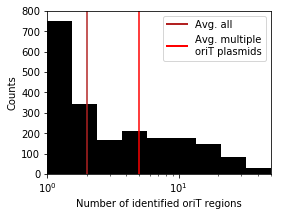

In [7]:
# Num orit

plt.figure(figsize=(4,3))

tmp = (df4600
       .groupby('plasmid_id').mob
       .count()
      )
bmin, bmax = 1, 50
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 10)
tmp.plot.hist(bins=logbins, color='k')

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='firebrick')
plt.ylim(0,800)

tmp = (df4600[df4600.num_orit>1]
       .groupby('plasmid_id').mob
       .count()
      )

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='r')
plt.ylim(0,800)

plt.xscale('log')
plt.xlim(bmin,bmax)
plt.ylabel('Counts')
plt.xlabel('Number of identified oriT regions')

custom_lines = [Line2D([0], [0], color='firebrick', lw=2),
               Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg. all',
                         'Avg. multiple\noriT plasmids'])

plt.show()

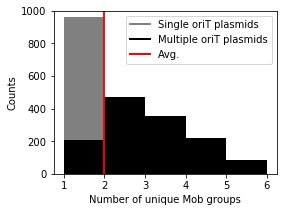

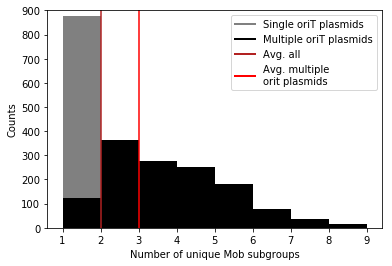

In [8]:
# Analyse

plt.figure(figsize=(4,3))
# all mobile
tmp = (df4600
       .groupby('plasmid_id').mob
       .apply(lambda x: len(set(x)))
      )
ax = tmp.hist(bins=5,color='grey')
ax.grid(False)

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='firebrick')
plt.ylim(0,1000)

# overlay with multi-orit plasmids
tmp = (df4600[df4600.num_orit>1]
       .groupby('plasmid_id').mob
       .apply(lambda x: len(set(x)))
      )
ax = tmp.hist(bins=5,color='k')
ax.grid(False)
plt.xlabel('Number of unique Mob groups')
plt.ylabel('Counts')

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='r')
plt.ylim(0,1000)

custom_lines = [Line2D([0], [0], color='grey', lw=2),
               Line2D([0], [0], color='k', lw=2),
               #Line2D([0], [0], color='firebrick', lw=2),
               Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Single oriT plasmids',
                        'Multiple oriT plasmids',
                         'Avg.'])
#                         'Avg. all',
#                         'Avg. multiple\norit plasmids'])

plt.show()

# all mobile
tmp = (df4600
       .groupby('plasmid_id').mob_subgroup2
       .apply(lambda x: len(set(x)))
      )
ax = tmp.hist(bins=8,color='grey')
ax.grid(False)

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='firebrick')
plt.ylim(0,1000)

# overlay with multi-orit plasmids
tmp = (df4600[df4600.num_orit>1]
       .groupby('plasmid_id').mob_subgroup2
       .apply(lambda x: len(set(x)))
      )
ax = tmp.hist(bins=8,color='k')
ax.grid(False)
plt.xlabel('Number of unique Mob subgroups')
plt.ylabel('Counts')

plt.plot([tmp.median(),tmp.median()],[0,1000],
        color='r')
plt.ylim(0,900)

custom_lines = [Line2D([0], [0], color='grey', lw=2),
               Line2D([0], [0], color='k', lw=2),
               Line2D([0], [0], color='firebrick', lw=2),
               Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Single oriT plasmids',
                        'Multiple oriT plasmids',
                        'Avg. all',
                        'Avg. multiple\norit plasmids'])

plt.show()

In [9]:
# sizes of datasets and averages

(df4600[df4600.num_orit>1]
    .groupby('plasmid_id').mob
    .apply(lambda x: len(set(x)))
    .value_counts()
 .reset_index()
 .sort_values(by='index')
 .set_index('index')
)

tmp = (df4600[df4600.num_orit>1]
    .groupby('plasmid_id').mob_subgroup2
    .apply(lambda x: len(set(x)))
    .value_counts()
 .reset_index()
 .sort_values(by='index')
 .set_index('index')
)
print(tmp)

# Over XX% of plasmids contained either multiple mob
# subgorups or mob groups
print(1-tmp.loc[1]/df4600[df4600.num_orit>1].plasmid_id.unique().shape[0])


       mob_subgroup2
index               
1                125
2                365
3                277
4                250
5                183
6                 79
7                 38
8                 12
9                  2
mob_subgroup2    0.906086
Name: 1, dtype: float64


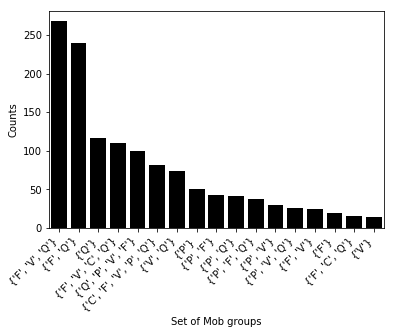

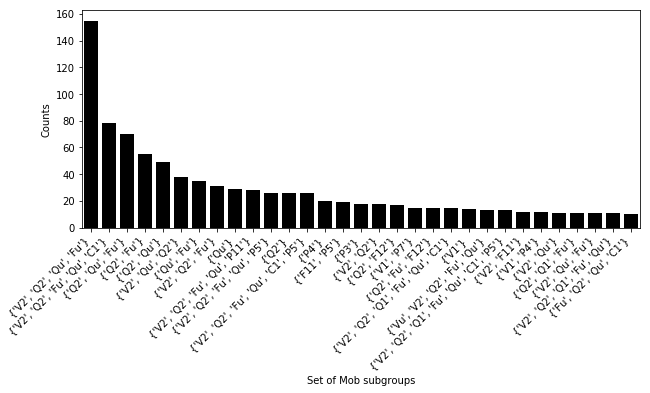

In [10]:
# Most frequent Mob group and subgroups 
# occurences and co-occurences

tmp = (df4600[df4600.num_orit>1]
 .groupby('plasmid_id').mob
 .apply(frozenset)
 .value_counts() 
 .reset_index()
)
tmp['xlabel'] = tmp['index'].apply(lambda x: str(x)[10:-1])

sns.barplot(data=tmp[tmp.mob>9],
            x='xlabel',y='mob',color='k')
plt.xticks(rotation=45,ha='right')

plt.xlabel('Set of Mob groups')
plt.ylabel('Counts')
plt.show()

plt.figure(figsize=(10,4))
tmp = (df4600[df4600.num_orit>1]
 .groupby('plasmid_id').mob_subgroup2
 .apply(frozenset)
 .value_counts() 
 .reset_index()
)
tmp['xlabel'] = tmp['index'].apply(lambda x: str(x)[10:-1])

sns.barplot(data=tmp[tmp.mob_subgroup2>9],
            x='xlabel',y='mob_subgroup2',color='k')
plt.xticks(rotation=45,ha='right')

plt.xlabel('Set of Mob subgroups')
plt.ylabel('Counts')
plt.show()


Text(0, 0.5, 'Counts')

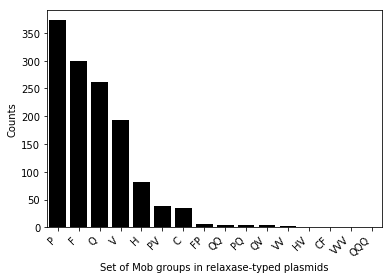

In [11]:
tmp = (p4600[p4600['Is_Mob?']==1]
       .Mob
       .value_counts()
       .reset_index()
      )

sns.barplot(data=tmp,
            x='index',y='Mob',color='k')
plt.xticks(rotation=45,ha='right')

plt.xlabel('Set of Mob groups in relaxase-typed plasmids')
plt.ylabel('Counts')

## Graph query orit nodes

In [12]:
# edgelist
# create edgelist from filtered orit hits

# number of edges estimated from df
print(df4
      .groupby('Genbank')
      .query_index
      .count()
      .sort_values(ascending=False)
      .apply(lambda x: (x*(x-1))/2)
      .sum()
     )

# expand orit index edgelist as undirected graph from df4
# from this also mob graph can be simply created
orit_edgelist = (df4
                 .groupby('plasmid_id')
                 .apply(assemble_edgelists)
                 .reset_index()
                 .drop(columns=['level_1'])
                )
print(orit_edgelist.shape) # num all edges
orit_edgelist.head()


79004.0
(79004, 4)


,plasmid_id,node1,node2,p_value
0,NC_000914,20,24,-41.419
1,NC_000914,20,24,-41.419
2,NC_000914,20,24,-41.419
3,NC_000914,20,25,-41.419
4,NC_000914,20,31,-41.419


In [13]:
# create unique edgelist with edge_count
# count and merge occurences

# nodes to set
tmp = orit_edgelist.copy(deep=True)
tmp['nodeset'] = tmp.apply(lambda x: tuple(np.sort([x.node1,x.node2])),axis=1)
tmp.head()
print(len(set(tmp.nodeset.unique())))

tmp2 = pd.DataFrame(tmp
        .groupby('nodeset')
        .plasmid_id
        .apply(list)
           )
tmp2['p_value'] = (tmp
        .groupby('nodeset')
        .p_value
        .min() # here take strongest representative
           )
tmp2['edge_count'] = tmp2.plasmid_id.apply(len)
# put nodes back to two columns
tmp2 = tmp2.reset_index()
tmp2['node1'] = tmp2.nodeset.apply(lambda x: x[0])
tmp2['node2'] = tmp2.nodeset.apply(lambda x: x[1])

orit_edgelist_unique = tmp2
# num unique edges
print(orit_edgelist_unique.shape) 
# num all edges
print(orit_edgelist_unique.edge_count.sum())
orit_edgelist_unique.head()


552
(552, 6)
79004


,nodeset,plasmid_id,p_value,edge_count,node1,node2
0,"(1, 31)",[NC_009982],-36.0506,1,1,31
1,"(1, 50)",[NC_010716],-34.2896,1,1,50
2,"(2, 13)",[NC_022609],-12.5449,1,2,13
3,"(2, 21)",[NC_016846],-13.2470,1,2,21
4,"(2, 22)",[NC_010558],-60.9138,1,2,22


6.0
3528


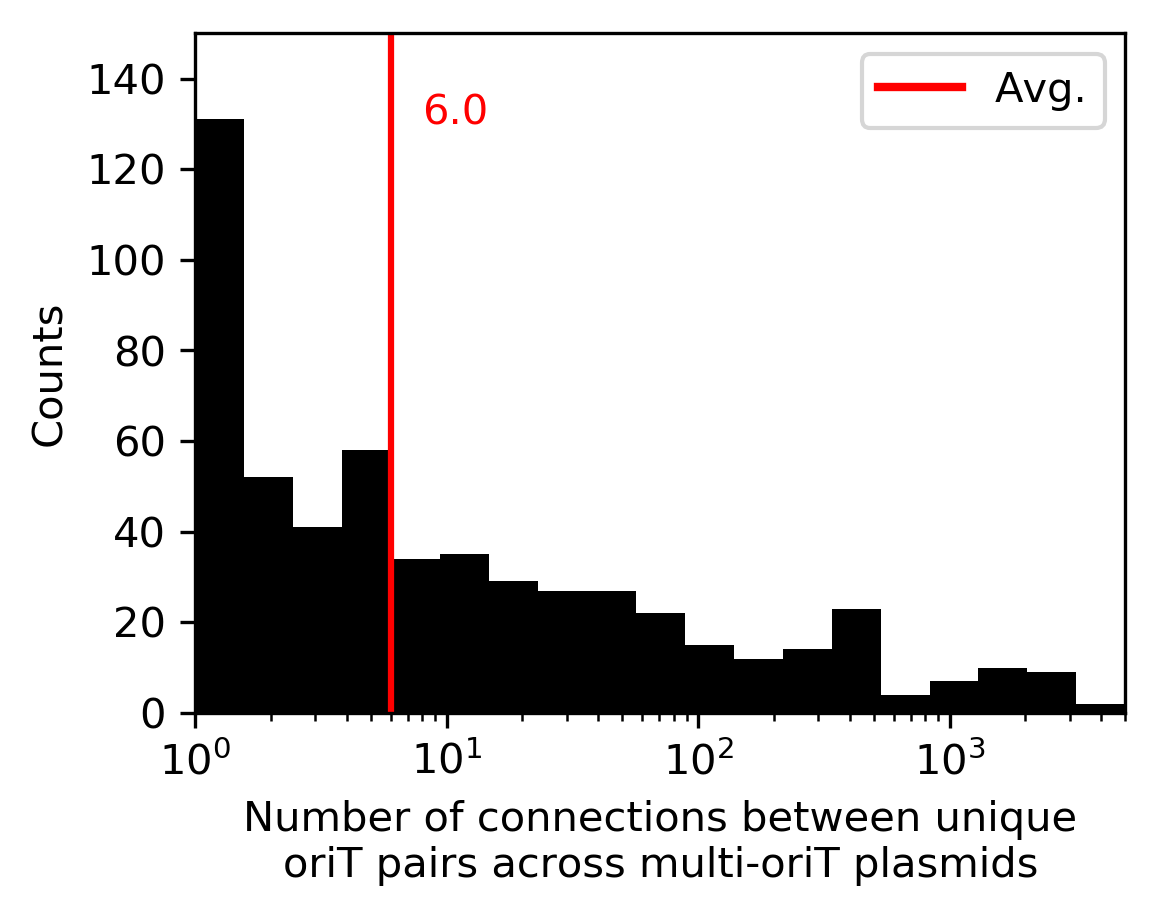

In [14]:
# log hist edge_count

mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,3))
bmin, bmax = 1, 5000
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 20)
ax = orit_edgelist_unique.edge_count.hist(bins=logbins, color='k')
plt.xscale('log')
plt.xlim(bmin,bmax)
plt.ylabel('Counts')
plt.xlabel('Number of connections between unique\noriT pairs across multi-oriT plasmids')
ax.grid(False)

plt.plot([orit_edgelist_unique.edge_count.median(),
          orit_edgelist_unique.edge_count.median()],
        [0,200],'r')
plt.annotate(orit_edgelist_unique.edge_count.median(),
            xy=(8,130),color='r')
plt.ylim([0,150])
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=1)

plt.savefig('f3b.svg')

print(orit_edgelist_unique.edge_count.median())
print(orit_edgelist_unique.edge_count.max())


552
[0.96501312 0.14667871 0.01225543]


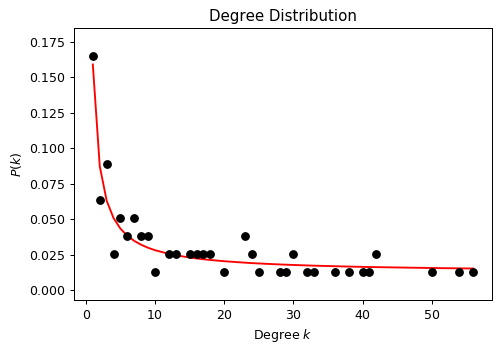

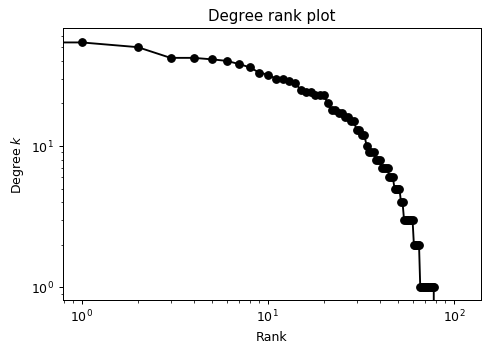

    node  degree        cc
0      1       2  1.000000
3      2       6  1.000000
9      3       7  0.857143
13     4       2  1.000000
15     5      17  1.000000


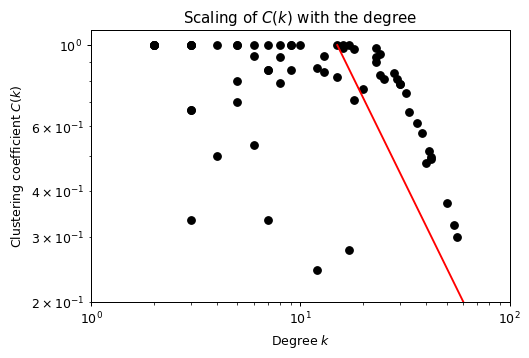

In [15]:
# graph

mpl.rcParams['figure.dpi'] = 90

T = frames_to_graph(orit_nodelist, orit_edgelist_unique, create=nx.Graph())
for u, v, d in T.edges(data=True):
    #print(d['plasmid_id'])
    T.add_edge(u,v,Is_Mob = p4600[p4600.Genbank==d['plasmid_id'][0]]['Is_Mob?'].values[0])
    T.add_edge(u,v,Mob = p4600[p4600.Genbank==d['plasmid_id'][0]]['Mob'].values[0])
    T.add_edge(u,v,weight = rescale_pval(d['p_value'],orit_edgelist.p_value))
    #T.add_edge(u,v,weight = rescale_pval(d['p_value'],pd.DataFrame([-8,-132])))
    #T.add_edge(u,v,weight2 = rescale_pval(d['edge_count'],orit_edgelist.edge_count))
    
#T.edges(data=True)
print(T.size())
    
# Degree analysis
#plot_degree_histogram(T)
plot_degree_distribution(T)
plot_degree_rank(T)
# #print(sorted(d for n, d in T.degree()))

plot_degree_clustering(T)

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 82, 83, 88, 93, 96, 97, 98, 99, 102, 107, 108, 111}, {112, 36}, {58, 59}, {10}, {19}, {32}, {34}, {45}, {49}, {57}, {66}, {67}, {75}, {77}, {78}, {79}, {80}, {81}, {84}, {85}, {86}, {87}, {89}, {90}, {91}, {92}, {94}, {95}, {100}, {101}, {103}, {104}, {105}, {106}, {109}, {110}]
Number of connected components:  36
Number of nodes in connected subgraph:  79
Number of connected components with elements > 1:  1


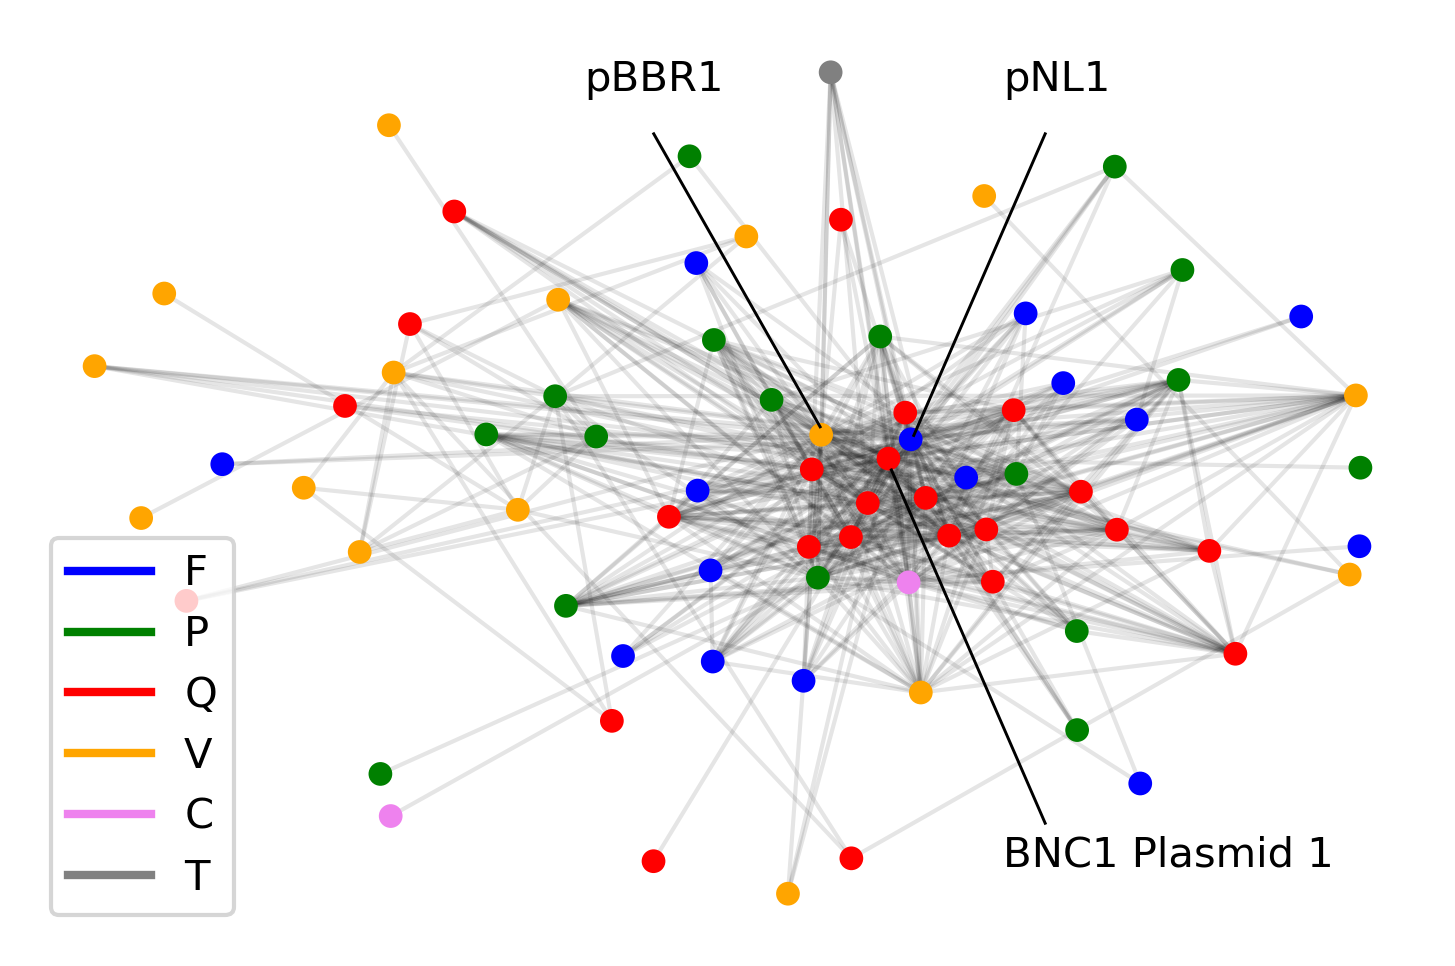

In [16]:
# Conncected components
    
plot_connected_components(T)
    
# https://networkx.github.io/documentation/stable/reference/algorithms/component.html
# Gcc = (G.subgraph(c) for c in nx.connected_components(G))
print(list(nx.connected_components(T))) # use this to filter data and discuss
print('Number of connected components: ', len(list(nx.connected_components(T))))
#print(nx.number_connected_components(G))
connected_nodes = []
[connected_nodes.extend(list(component)) for component in list(nx.connected_components(T)) if len(component) > 1]
print('Number of nodes in connected subgraph: ', np.unique(np.array(connected_nodes)).shape[0])
count = []
print('Number of connected components with elements > 1: ', len([count.append(component) for component in list(nx.connected_components(T)) if len(component) > 2]))


5    0.380952
dtype: float64


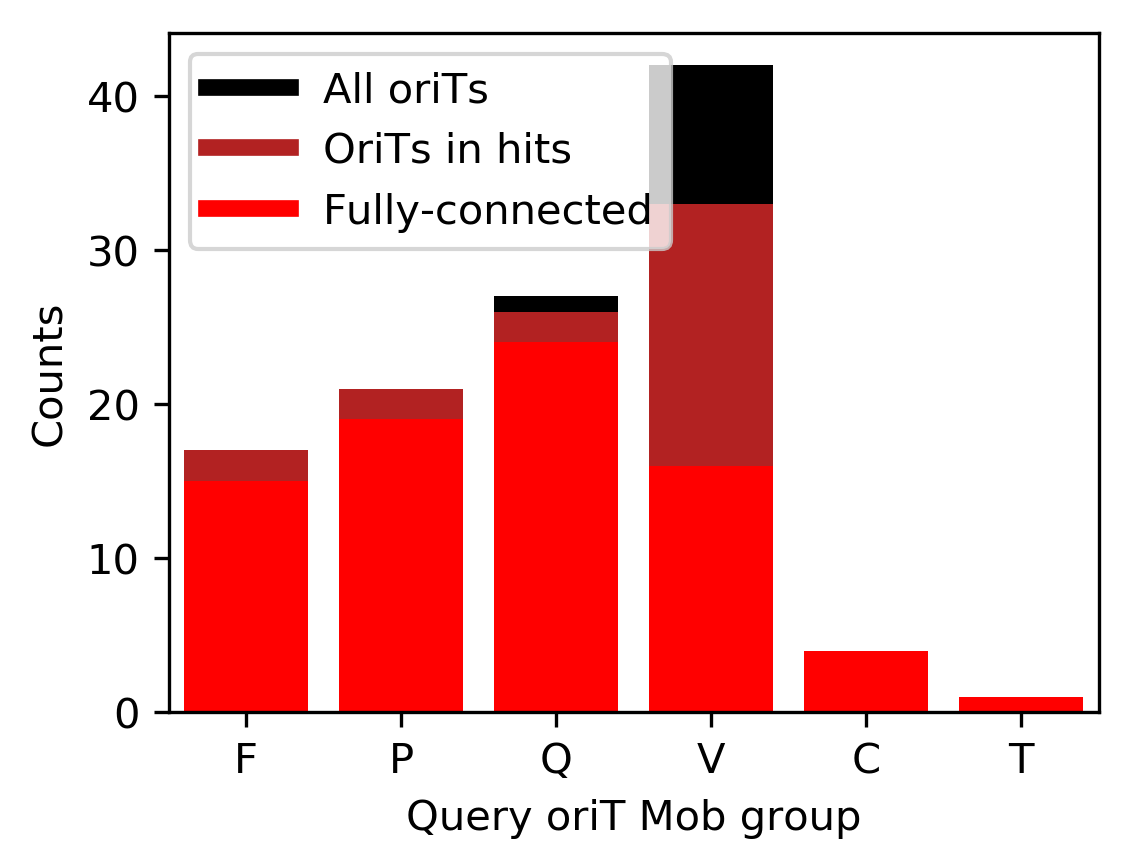

In [17]:
# analyse connected components vs all orits

tmp = (orit_nodelist[orit_nodelist.node.isin(np.array(connected_nodes))]
 .groupby('Mob')
 .Genbank
 .count()
    .reset_index()
    .rename(columns={'Genbank':'conn'})
)

tmp['all'] = (orit_nodelist
 .groupby('Mob')
 .Genbank
 .count()
              .values
)

tmp['hits'] = (orit_nodelist[orit_nodelist.node.isin(df4.query_index.unique())]
 .groupby('Mob')
 .Genbank
 .count()
              .values
)

mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,3))

sns.barplot(data=tmp,
           x='Mob',y='all',
            linewidth=0, facecolor='black',
           errcolor=".2", edgecolor=".2",
           order=['F','P','Q','V','C','T'])
sns.barplot(data=tmp,
           x='Mob',y='hits',
            linewidth=0, facecolor='firebrick',
           errcolor=".2", edgecolor='firebrick',
           order=['F','P','Q','V','C','T'])
sns.barplot(data=tmp,
           x='Mob',y='conn',
            linewidth=0, facecolor='red',
           errcolor=".2", edgecolor='red',
           order=['F','P','Q','V','C','T'])
plt.xlabel('Query oriT Mob group')
plt.ylabel('Counts')

# legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='firebrick', lw=4),
                Line2D([0], [0], color='r', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['All oriTs',
                         'OriTs in hits',
                         'Fully-connected'],
          loc='upper left')

print(tmp[tmp.Mob=='V'].conn.divide(tmp[tmp.Mob=='V']['all']))

plt.savefig('f2c.svg')


In [18]:
# How much of mob V is in fully connected part
tmp[tmp.Mob=='V'].conn.divide(tmp[tmp.Mob=='V']['all'])

5    0.380952
dtype: float64

In [19]:
## analyse top connected nodes
# make new frame by merge with orit_nodelist

T2 = frames_to_graph(orit_nodelist, orit_edgelist, create=nx.MultiGraph())
print(T2.size())
df_orit = pd.DataFrame.from_dict(T2.degree())
df_orit.columns=['node','degree']
df_orit.head()

df_orit = (df_orit
           .merge(orit_nodelist,on='node',how='left')
           .sort_values(by='degree',ascending=False))

# However we are interested also in amount of unique connections
tmp = pd.DataFrame.from_dict(T.degree())
tmp.columns=['node','degree_unique']
df_orit = (df_orit
           .merge(tmp,on='node',how='left')
           .sort_values(by='degree_unique',ascending=False)
           #.drop(columns='num_plasmids')
          )

# on how many plasmids
tmp = (orit_nodelist[['node','Plasmid_name']].merge(df4
                             .groupby('query_index')
                             .plasmid_id
                             .count()
                             .reset_index()
                             .rename(columns={'plasmid_id':'num_plasmids'}), 
 left_on='node',right_on='query_index',how='right'))
 

df_orit = df_orit.merge(tmp[['Plasmid_name','num_plasmids']],
              on='Plasmid_name',how='left')

# how many mob groups does it connect to
tmp = df4[['query_index','plasmid_id']].merge(df4
 .groupby(['plasmid_id'])
 .mob
 .unique()
 .reset_index(),on='plasmid_id',how='left')
tmp = tmp.groupby('query_index').mob.apply(lambda x: frozenset([it for el in x for it in el]))

df_orit = df_orit.merge((orit_nodelist[['node','Plasmid_name']].merge(tmp, 
 left_on='node',right_on='query_index',how='right')).drop(columns='node'),
              on='Plasmid_name',how='left')

df_orit['mob_count'] = len

df_orit[['node','Plasmid_name','Species','Mob','Mob subgroup','degree','degree_unique','num_plasmids','mob']].head(30)


79004


,node,Plasmid_name,Species,Mob,Mob subgroup,degree,degree_unique,num_plasmids,mob
0,50,pNL1,Novosphingobium aromaticivorans,F,u,18456,56,1512.0,"(C, T, F, V, P, Q)"
1,64,BNC1 Plasmid 1,Mesorhizobium sp.,Q,2,22651,54,1772.0,"(C, T, F, V, P, Q)"
2,31,pBBR1,Bordetella bronchiseptica,V,2,20875,50,1371.0,"(C, T, F, V, P, Q)"
3,72,pDOJH10S,Bifidobacterium longum,Q,u,24632,42,1617.0,"(C, T, F, V, P, Q)"
4,69,pKJ50,Bifidobacterium longum,Q,u,15585,42,921.0,"(C, T, F, V, P, Q)"
5,24,pTiC58,Agrobacterium tumefaciens,Q,2,13879,41,883.0,"(C, T, F, V, P, Q)"
6,13,ColE1,Escherichia coli,P,5,3179,40,250.0,"(C, T, F, V, P, Q)"
7,71,pMG160,Rhodobacter blasticus,Q,u,11863,38,698.0,"(C, T, F, V, P, Q)"
8,35,CloDF13,Escherichia coli,C,1,6429,36,334.0,"(C, T, F, V, P, Q)"
9,21,pSymB,Sinorhizobium meliloti,Q,2,3535,33,192.0,"(C, F, V, P, Q)"


## Graph mob nodes

In [20]:
# here full set of plasmids is needed
# load data

p4600 = pd.read_csv(folder+fn2,sep=';')
p4600.reset_index(inplace=True)

# merge p4600 and hits - just mobile
tmp = p4600.drop(columns=['index','Rep typea', 'ColE1b',
                    'GR', 'Rep_family', 'MOBc', 
                    'MPFc', 'T4CPd','VirB4d', 
                    'Putative transferabilitye'])
print(tmp.shape)
#
df4600 = (tmp
          .merge(df4[['plasmid_id','mob','mob_subgroup',
             'p_value','nic_location','query_index']],
        left_on='Genbank',right_on='plasmid_id',
        how='left')
)
df4600['mob_subgroup2'] = df4600.apply(lambda x: x.mob+x.mob_subgroup,axis=1)
print(df4600.shape)
df4600.head()

# get subset of plasmids with multiple orits
# groupby count and merge to get this inside
tmp = (df4600
       .groupby('plasmid_id')
       .mob.count()
       .reset_index()
       .rename(columns={'mob':'num_orit'})
      )
df4600 = df4600.merge(tmp,on='plasmid_id',how='left')
df4600.fillna(value={'num_orit':0},inplace=True)
print(df4600.shape)
df4600.head()


(4602, 13)
(14015, 20)
(14015, 21)


,Genbank,Plasmid_name,Strain,Species,Genus,Order,Class,Phylum,Kingdom,Size (bp),...,Is_Mob?,Mob,plasmid_id,mob,mob_subgroup,p_value,nic_location,query_index,mob_subgroup2,num_orit
0,NC_005326,Clostridium difficile plasmid pCD6,Clostridioides difficile (Clostridium difficile),Clostridioides difficile,Clostridioides,Clostridiales,Clostridia,Firmicutes,Bacteria,6830,...,0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,Acaryochloris,Chroococcales,-,Cyanobacteria,Bacteria,374161,...,1,F,NC_009926,P,6,-8.9187,184676.0,14.0,P6,5.0
2,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,Acaryochloris,Chroococcales,-,Cyanobacteria,Bacteria,374161,...,1,F,NC_009926,F,u,-8.1666,232470.0,50.0,Fu,5.0
3,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,Acaryochloris,Chroococcales,-,Cyanobacteria,Bacteria,374161,...,1,F,NC_009926,Q,2,-8.1360,147650.0,64.0,Q2,5.0
4,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,Acaryochloris,Chroococcales,-,Cyanobacteria,Bacteria,374161,...,1,F,NC_009926,Q,u,-9.0727,147434.0,69.0,Qu,5.0


In [21]:
# Compare No. plasmids, No. species, No. oriT, No. connections
# per single MOB versus multiple oriT set
# for all 6 MOB classes

select = [(df4600['Is_Mob?'] == 1), (df4600['num_orit']>0)]
table = []
col_l1 = ['MOB', 'oriT', 'Rel. increase']
col_l2 = ['plasmids', 'species', 'oriT', 'all_conn', 'avg_conn', 'avg_MOB_conn']
ind = [mob for mob in df4600.Mob.unique() if len(mob)==1 and mob not in '-']

# MOB
p4600_subset = p4600[p4600['Is_Mob?']==1].copy(deep=True)

# add relaxase num
p4600_subset['num_mob'] = p4600_subset.Mob.str.len()
p4600_subset['num_connections'] = p4600_subset.Mob.apply(lambda x: get_all_conn(list(x)))
p4600_subset['nunique_connections'] = p4600_subset.Mob.apply(lambda x: get_unique_group_conn(list(x)))

# melt
p4600_mob = []
[p4600_mob.extend(melt_mob_relaxase(row)) for index, row in p4600_subset.iterrows()]
p4600_mob = pd.DataFrame(p4600_mob)
print(p4600_mob.shape)

# get values
gb = p4600_mob.groupby('Mob')
table.append(gb.Plasmid_name.nunique())
table.append(gb.Species.nunique())
table.append(gb.size())
#print(gb.num_mob.count()) # same thing
table.append(gb.num_connections.count())
table.append(gb.num_connections.mean())
table.append(gb.nunique_connections.mean())

# oriT
p4600_subset = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .mob
 .apply(lambda x: len(set(x)))
 .reset_index()
 .rename(columns={'mob':'num_orit'})
)
p4600_subset['num_connections'] = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .mob
 .apply(list)
 .apply(get_all_conn)
 .values                        
)
p4600_subset['nunique_connections'] = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .mob
 .apply(list)
 .apply(get_unique_group_conn)
 .values
)
p4600_subset['mob'] = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .mob
 .apply(list)
                       .values
)
p4600_subset['p_value'] = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .p_value
 .apply(list)
                       .values
)
p4600_subset['nic_location'] = (df4600[df4600['num_orit']>0]
 .groupby('plasmid_id')
 .nic_location
 .apply(list)
                       .values
)

# melt
p4600_mob = (df4600[df4600.num_orit>0]
             .merge(p4600_subset,
                   left_on='Genbank',right_on='plasmid_id',
                   how='left')
            )
print(p4600_mob.shape)

# get values
gb = p4600_mob.groupby('mob_x')
table.append(gb.Plasmid_name.nunique())
table.append(gb.Species.nunique())
table.append(gb.size())
#print(gb.num_mob.count()) # same thing
table.append(gb.num_connections.count())
table.append(gb.num_connections.mean())
table.append(gb.nunique_connections.mean())

# table3 and relative values
ranges = list(range(0,6))
tmp1 = pd.DataFrame(table[:6], index=[col+'1' for col in col_l2]).transpose()
tmp2 = pd.DataFrame(table[6:], index=[col+'2' for col in col_l2]).transpose()
table3 = pd.concat([tmp1,tmp2], axis=1)
tmp3 = pd.DataFrame(table3.iloc[:,6:].values/table3.iloc[:,:6].values, index=np.unique([tmp1.index.values,tmp2.index.values]), columns=[col+'3' for col in col_l2])
table3 = pd.concat([tmp1,tmp2,tmp3], axis=1).transpose()
table3


(1377, 26)
(11497, 28)


,C,F,H,P,Q,T,V
plasmids1,35.000000,305.000000,82.000000,418.000000,277.000000,NaN,241.000000
species1,20.000000,92.000000,38.000000,170.000000,112.000000,NaN,88.000000
oriT1,35.000000,306.000000,83.000000,423.000000,284.000000,NaN,246.000000
all_conn1,35.000000,306.000000,83.000000,423.000000,284.000000,NaN,246.000000
avg_conn1,0.028571,0.022876,0.012048,0.118203,0.098592,NaN,0.239837
avg_MOB_conn1,0.028571,0.022876,0.012048,0.118203,0.031690,NaN,0.178862
plasmids2,253.000000,1047.000000,NaN,694.000000,1274.000000,1.0,923.000000
species2,137.000000,304.000000,NaN,217.000000,398.000000,1.0,322.000000
oriT2,351.000000,1745.000000,NaN,831.000000,6867.000000,1.0,1702.000000
all_conn2,351.000000,1745.000000,NaN,831.000000,6867.000000,1.0,1702.000000


In [22]:
# sanity check
p4600_subset[p4600_subset.mob.apply(len)>1].shape#.mob.apply(get_all_conn).sum()

(1331, 7)

## Create graph from orit edgelist

In [23]:
# merge to mob data from orit nodelist
mob_edgelist = (orit_edgelist
                .merge(orit_nodelist[['node','Mob']],
                       left_on='node1',right_on='node',how='left')
                .rename(columns={'Mob':'Mob_orit1'})
                .drop(columns=['node'])
                .merge(orit_nodelist[['node','Mob']],
                       left_on='node2',right_on='node',how='left')
                .rename(columns={'Mob':'Mob_orit2','p_value':'min_pval'})
                .drop(columns=['node'])
               )

mob_edgelist.head()


,plasmid_id,node1,node2,min_pval,Mob_orit1,Mob_orit2
0,NC_000914,20,24,-41.419,Q,Q
1,NC_000914,20,24,-41.419,Q,Q
2,NC_000914,20,24,-41.419,Q,Q
3,NC_000914,20,25,-41.419,Q,Q
4,NC_000914,20,31,-41.419,Q,V


In [24]:
# Figure
hv.output(size=300)

l, w, links, nodes = plot_holoviews_chord(mob_edgelist, remove_self=True)

# # define colors
# df_col = pd.DataFrame(mob_color,columns=['color']).apply(lambda x: 'dark'+x)
# df_col['mob'] = ['F','P','Q','V','C','T']
# tmp = [x[0] for x in df_col.set_index('mob').loc[['Q','V','C','F','P','T']].values]
cat10hex = ['#1f77b4', #1f77b4
            '#ff7f0e', #ff7f0e
            '#2ca02c', #2ca02c
            '#d62728',#d62728
            '#9467bd', #9467bd
            '#8c564b', #8c564b
            '#e377c2', #e377c2
            '#7f7f7f', #7f7f7f
            '#bcbd22', #bcbd22
            '#17becf'] #17becf
cmap1 = mpl.colors.ListedColormap(list(pd.Series(cat10hex).iloc[[0,2,3,1,4,7]].values))

# plot bokeh
chord = hv.Chord((links, nodes)) #.select(value=(5, None)) -> cutoff
#chord = hv.Chord(links)
# chord.opts(
#     opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
#                labels='name', node_color=dim('index').str()))
chord.opts(
    opts.Chord(cmap=cmap1, edge_cmap=cmap1, edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

hv.save(chord, 'f3c.svg', fmt='svg')

# blue orange green red violet gray

In [25]:
# Table S3-X
# Sum and unstack to get edge count matrix

tmp = (mob_edgelist
 .groupby(['Mob_orit1','Mob_orit2'])
 .min_pval
 .count()
 .unstack()
 .fillna(0)
)
#print(tmp)

mob_adj = pd.DataFrame(tmp.values+np.tril(tmp.values,k=-1).transpose()+np.triu(tmp.values,k=1).transpose(),
                      columns=tmp.columns,index=tmp.index)

mob_adj


Mob_orit2,C,F,P,Q,T,V
Mob_orit1,,,,,,
C,122.0,742.0,195.0,4371.0,1.0,889.0
F,742.0,970.0,664.0,12637.0,4.0,2806.0
P,195.0,664.0,140.0,3118.0,1.0,743.0
Q,4371.0,12637.0,3118.0,35062.0,17.0,15081.0
T,1.0,4.0,1.0,17.0,0.0,2.0
V,889.0,2806.0,743.0,15081.0,2.0,1439.0


In [26]:
# sort to determine largest fluxes
(mob_adj
 .stack()
 .sort_values(ascending=False)
 .head(10)
)

Mob_orit1  Mob_orit2
Q          Q            35062.0
V          Q            15081.0
Q          V            15081.0
F          Q            12637.0
Q          F            12637.0
C          Q             4371.0
Q          C             4371.0
           P             3118.0
P          Q             3118.0
V          F             2806.0
dtype: float64

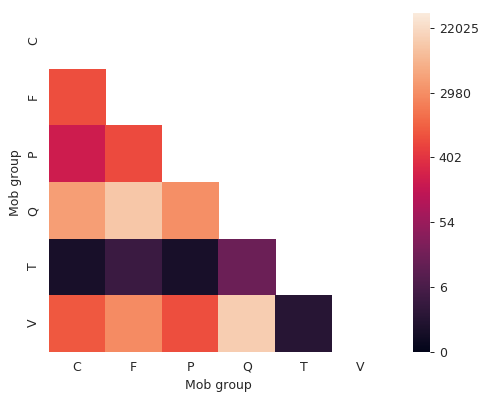

In [27]:
# plot adjacenct heatmap

mpl.rcParams['figure.dpi'] = 90

mask = np.zeros_like(mob_adj)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(mob_adj.apply(lambda x: np.log(x+1)), 
                     mask=mask, square=True) #vmax=15000

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
ticks = [0,2,4,6,8,10]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([int(np.round(np.exp(x)-1)) for x in ticks])

plt.xlabel('Mob group')
plt.ylabel('Mob group')
plt.show()


## MOB subgroup specific transfers

In [28]:
# redo whole thing with MOB subgroups

orit_nodelist['Mobs'] = orit_nodelist.apply(lambda x: x['Mob']+x['Mob subgroup'],axis=1)
#orit_nodelist.head()

# merge to mob data from orit nodelist
mobs_edgelist = (orit_edgelist
                .merge(orit_nodelist[['node','Mobs']],
                       left_on='node1',right_on='node',how='left')
                .rename(columns={'Mobs':'Mob_orit1'})
                .drop(columns=['node'])
                .merge(orit_nodelist[['node','Mobs']],
                       left_on='node2',right_on='node',how='left')
                .rename(columns={'Mobs':'Mob_orit2','p_value':'min_pval'})
                .drop(columns=['node'])
               )

mobs_edgelist.head()

,plasmid_id,node1,node2,min_pval,Mob_orit1,Mob_orit2
0,NC_000914,20,24,-41.419,Q2,Q2
1,NC_000914,20,24,-41.419,Q2,Q2
2,NC_000914,20,24,-41.419,Q2,Q2
3,NC_000914,20,25,-41.419,Q2,Q2
4,NC_000914,20,31,-41.419,Q2,V2


In [29]:
# Table S3-X
# Sum and unstack to get edge count matrix

tmp = (mobs_edgelist
 .groupby(['Mob_orit1','Mob_orit2'])
 .min_pval
 .count()
 .unstack()
 .fillna(0)
)
# add missing index values with 0
print(tmp.index[~tmp.index.isin(tmp.columns)])

tmp['P11'] = np.zeros((24,))
tmp['P2'] = np.zeros((24,))
tmp

mobs_adj = pd.DataFrame(tmp.values+np.tril(tmp.values,k=-1).transpose()+np.triu(tmp.values,k=1).transpose(),
                      columns=tmp.columns,index=tmp.index)

mobs_adj


Index(['P11', 'P2'], dtype='object', name='Mob_orit1')


Mob_orit2,C1,C2,F11,F12,Fu,P12,P13,P14,P3,P4,...,Q2,Q3,Qu,T1,V1,V2,V4,Vu,P11,P2
Mob_orit1,,,,,,,,,,,,,,,,,,,,,
C1,116.0,0.0,1.0,5.0,736.0,17.0,25.0,4.0,0.0,2.0,...,873.0,0.0,3274.0,1.0,146.0,0.0,0.0,887.0,0.0,0.0
C2,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F11,1.0,0.0,2.0,2.0,10.0,0.0,1.0,0.0,0.0,0.0,...,21.0,0.0,25.0,0.0,0.0,1.0,0.0,30.0,0.0,0.0
F12,5.0,0.0,2.0,0.0,49.0,8.0,1.0,0.0,1.0,0.0,...,64.0,0.0,47.0,0.0,1.0,5.0,0.0,18.0,0.0,0.0
Fu,736.0,0.0,10.0,49.0,907.0,78.0,95.0,27.0,0.0,3.0,...,2916.0,4.0,8972.0,0.0,394.0,4.0,0.0,2737.0,0.0,0.0
P11,17.0,0.0,0.0,8.0,78.0,1.0,1.0,0.0,2.0,0.0,...,168.0,0.0,161.0,0.0,0.0,86.0,0.0,1.0,0.0,0.0
P12,25.0,0.0,1.0,1.0,95.0,1.0,0.0,1.0,0.0,0.0,...,31.0,0.0,130.0,0.0,16.0,9.0,0.0,77.0,0.0,0.0
P13,4.0,0.0,0.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0,...,92.0,0.0,247.0,0.0,6.0,0.0,0.0,31.0,0.0,0.0
P14,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,26.0,0.0,29.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [30]:
# sort to determine largest fluxes
pd.DataFrame(mobs_adj
 .stack()
 .sort_values(ascending=False)
 .head(20)
)

0
Mob_orit1 Mob_orit2         
Q2        Qu         15983.0
Qu        Qu         10223.0
Q2        V1         10223.0
          Fu          8972.0
Fu        Qu          8972.0
V2        Qu          7309.0
Q2        Vu          7309.0
          Q2          7268.0
P7        Qu          7268.0
T1        Qu          3534.0
Q2        V2          3534.0
C1        Qu          3274.0
Q2        C1          3274.0
V2        Q2          3095.0
P7        Vu          3095.0
          Fu          2916.0
Fu        Q2          2916.0
V2        Fu          2737.0
Fu        Vu          2737.0
T1        Vu          1220.0